In [2]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn import preprocessing
import matplotlib.pyplot as pl
from IPython import get_ipython


In [3]:
%matplotlib inline
# Load the online news dataset
data = pd.read_csv("C:/Users/HP/Desktop/OnlineNewsPopularity.csv")
display(data.head())

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [4]:
# Get the statistics of original target attribute
popularity_raw = data[data.keys()[-1]]
popularity_raw.describe()
# Encode the label by threshold 1400

label_encoder = preprocessing.LabelEncoder()
popular_label = pd.Series(label_encoder.fit_transform(popularity_raw>=1400))

# Get the features from dataset
features_raw = data.drop(['url',data.keys()[1],data.keys()[-1]], axis=1)
display(features_raw.head())

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [5]:
data.keys()[-1]

' shares'

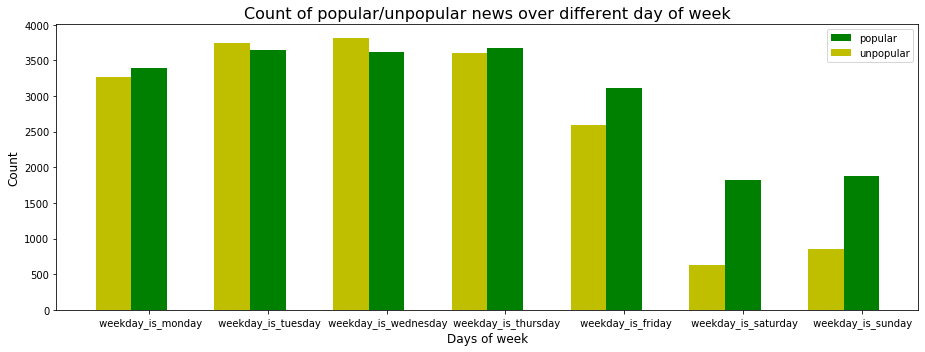

In [36]:
# Visualize the feature of different day of week
columns_day = features_raw.columns.values[29:36]
unpop=data[data[' shares']<1400]
pop=data[data[' shares']>=1400]
unpop_day = unpop[columns_day].sum().values
pop_day = pop[columns_day].sum().values

get_ipython().run_line_magic('matplotlib', 'inline')

fig = pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over different day of week", fontsize = 16)
pl.bar(np.arange(len(columns_day)), pop_day, width = 0.3, align="center", color = 'g', \
          label = "popular")
pl.bar(np.arange(len(columns_day)) - 0.3, unpop_day, width = 0.3, align = "center", color = 'y', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_day)), columns_day)
pl.ylabel("Count", fontsize = 12)
pl.xlabel("Days of week", fontsize = 12)
    
pl.legend(loc = 'upper right')
pl.tight_layout()
pl.savefig("days.pdf")
pl.show()

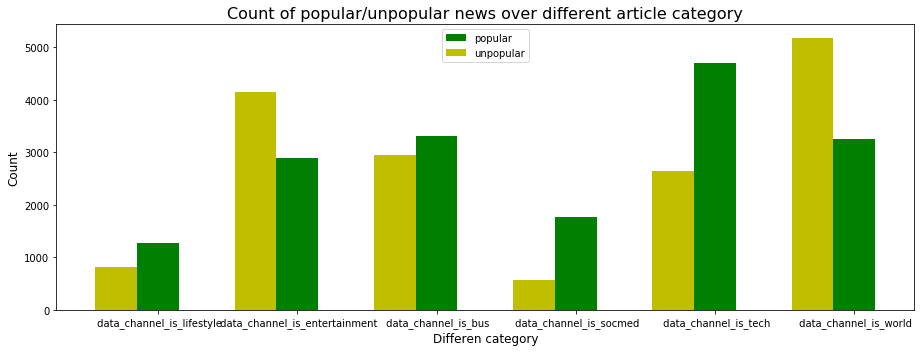

In [6]:
# Visualize the feature of different article category
columns_chan=features_raw.columns.values[11:17]
unpop_chan = unpop[columns_chan].sum().values
pop_chan = pop[columns_chan].sum().values
fig = pl.figure(figsize = (13,5))
pl.title("Count of popular/unpopular news over different article category", fontsize = 16)
pl.bar(np.arange(len(columns_chan)), pop_chan, width = 0.3, align="center", color = 'g', \
          label = "popular")
pl.bar(np.arange(len(columns_chan)) - 0.3, unpop_chan, width = 0.3, align = "center", color = 'y', \
          label = "unpopular")
pl.xticks(np.arange(len(columns_chan)), columns_chan)

pl.ylabel("Count", fontsize = 12)
pl.xlabel("Differen category", fontsize = 12)
    
pl.legend(loc = 'upper center')
pl.tight_layout()
pl.savefig("chan.pdf")
pl.show()

In [7]:
# Normalize the numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = [' n_tokens_title', ' n_tokens_content', ' num_hrefs', ' num_self_hrefs', ' num_imgs',' num_videos',\
            ' average_token_length',' num_keywords',' self_reference_min_shares',' self_reference_max_shares',\
             ' self_reference_avg_sharess']
features_raw[numerical] = scaler.fit_transform(data[numerical])
display(features_raw.head(n = 1))

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,0.47619,0.025844,0.663594,1.0,0.815385,0.013158,0.017241,0.007812,0.0,0.582024,...,0.378636,0.1,0.7,-0.35,-0.6,-0.2,0.5,-0.1875,0.0,0.1875


## USING RANDOM FOREST CLASSIFIER

In [8]:
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier

estimator_RF = RandomForestClassifier(random_state=0)
selector_RF = RFECV(estimator_RF, step=1, cv=5)
selector_RF = selector_RF.fit(features_raw, popular_label)
selector_RF.ranking_

array([1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

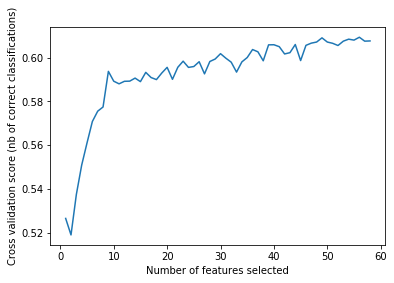

2
[' n_non_stop_words' ' data_channel_is_lifestyle']


In [9]:
pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation score (nb of correct classifications)")
pl.plot(range(1, len(selector_RF.grid_scores_) + 1), selector_RF.grid_scores_)
pl.show()

print (features_raw.columns.values[selector_RF.ranking_!=1].shape[0])
print (features_raw.columns.values[selector_RF.ranking_!=1])
features_RF = features_raw[features_raw.columns.values[selector_RF.ranking_==1]]

In [10]:
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split

X_train_RF, X_test_RF, y_train_RF, y_test_RF = train_test_split(features_RF, popular_label, test_size = 0.1, random_state = 0)


In [11]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
     results = {}
     start = time() # Get start time
     learner.fit(X_train[:sample_size], y_train[:sample_size])
     end = time() # Get end time

     results['train_time'] = end-start
        
    # Get predictions on the first 4000 training samples
     start = time() # Get start time
     predictions_test = learner.predict(X_test)
     predictions_train = learner.predict(X_train[:4000])
     end = time() # Get end time
    
    # Calculate the total prediction time
     results['pred_time'] = end-start
            
    # Compute accuracy on the first 4000 training samples
     results['acc_train'] = accuracy_score(y_train[:4000],predictions_train)
        
    # Compute accuracy on test set
     results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # Compute F-score on the the first 4000 training samples
     results['f_train'] = fbeta_score(y_train[:4000],predictions_train,beta=1)
        
    # Compute F-score on the test set
     results['f_test'] = fbeta_score(y_test,predictions_test,beta=1)
    
    # Compute AUC on the the first 4000 training samples
     results['auc_train'] = roc_auc_score(y_train[:4000],predictions_train)
        
    # Compute AUC on the test set
     results['auc_test'] = roc_auc_score(y_test,predictions_test)
       
    # Success
     print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
     print ("{} with accuracy {}, F1 {} and AUC {}.".format(learner.__class__.__name__,\
          results['acc_test'],results['f_test'], results['auc_test']))   
    # Return the results
     return results

In [12]:
clf_C = RandomForestClassifier(random_state=0)

# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train_RF.shape[0]*0.01)
samples_10 = int(X_train_RF.shape[0]*0.1)
samples_100 = X_train_RF.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_RF, y_train_RF, X_test_RF, y_test_RF)


RandomForestClassifier trained on 356 samples.
RandomForestClassifier with accuracy 0.594703656998739, F1 0.606994375152849 and AUC 0.5946464292947871.
RandomForestClassifier trained on 3567 samples.
RandomForestClassifier with accuracy 0.6078184110970997, F1 0.6062294251709293 and AUC 0.6095895215710603.
RandomForestClassifier trained on 35679 samples.
RandomForestClassifier with accuracy 0.6310214375788147, F1 0.6348889443473921 and AUC 0.6321088738704037.


In [13]:
def gridsearch(clf,parameters,X_train, y_train, X_test, y_test):
    scorer = make_scorer(roc_auc_score)
    grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters
    grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
    best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
    print (clf.__class__.__name__)
    print ("Unoptimized model\n------")
    print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions,beta=1)))
    print ("AUC on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
    print ("\nOptimized Model\n------")
    print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=1)))
    print ("Final AUC on the testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))
    print (best_clf)

In [14]:
from sklearn.metrics import make_scorer 
from sklearn.model_selection import GridSearchCV
parameters_RF = {"n_estimators": [10,20,50,100,250,500]}
gridsearch(clf_C,parameters_RF,X_train_RF, y_train_RF, X_test_RF, y_test_RF)

RandomForestClassifier
Unoptimized model
------
Accuracy score on testing data: 0.6310
F-score on testing data: 0.6349
AUC on testing data: 0.6321

Optimized Model
------
Final accuracy score on the testing data: 0.6767
Final F-score on the testing data: 0.7074
Final AUC on the testing data: 0.6731
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


# USING ADA BOOST CLASSIFIER


In [15]:
from sklearn.ensemble import AdaBoostClassifier

In [16]:
estimator = AdaBoostClassifier(random_state=0)
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(features_raw, popular_label)
selector.ranking_

array([41, 16, 11, 21,  1,  7,  1,  1,  1, 30,  1, 25,  1, 32,  1, 10, 37,
        1, 17,  1,  1,  1, 22,  1,  1,  1,  1,  1,  8, 40, 33, 35, 31,  2,
        3, 18,  4,  9,  5,  6, 12, 28,  1,  1, 36, 34, 19, 29, 20, 13, 23,
       24, 26, 27, 14, 15, 38, 39])

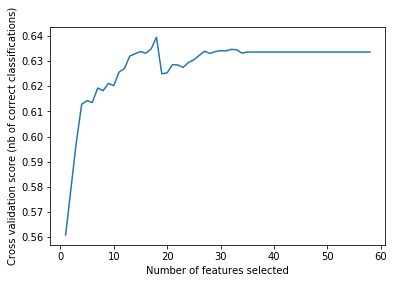

18
[' n_non_stop_unique_tokens' ' num_self_hrefs' ' num_imgs' ' num_videos'
 ' num_keywords' ' data_channel_is_entertainment'
 ' data_channel_is_socmed' ' kw_min_min' ' kw_avg_min' ' kw_min_max'
 ' kw_max_max' ' kw_min_avg' ' kw_max_avg' ' kw_avg_avg'
 ' self_reference_min_shares' ' self_reference_max_shares'
 ' global_subjectivity' ' global_sentiment_polarity']


In [18]:
# Plot the cv score vs number of features
pl.figure()
pl.xlabel("Number of features selected")
pl.ylabel("Cross validation score (nb of correct classifications)")
pl.plot(range(1, len(selector.grid_scores_) + 1), selector.grid_scores_)
pl.savefig('RFE_ADA.pdf')
pl.show()

print(features_raw.columns.values[selector.ranking_==1].shape[0])
print(features_raw.columns.values[selector.ranking_==1])
features_ADA = features_raw[features_raw.columns.values[selector.ranking_==1]]

In [21]:
# Split data into training and testing sets
from sklearn.metrics import accuracy_score, fbeta_score, roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split


X_train_ADA, X_test_ADA, y_train_ADA, y_test_ADA = train_test_split(features_ADA, popular_label, test_size = 0.1, random_state = 0)



In [22]:
from sklearn.ensemble import AdaBoostClassifier

In [23]:
# Initialize the model
clf_A = AdaBoostClassifier(random_state=0)

In [25]:
# Do the grid search for hyperparameters
from sklearn.metrics import make_scorer 
from sklearn.model_selection import GridSearchCV

parameters_ADA = {"n_estimators": [100,200,300,400],
              "learning_rate": [0.1,0.5,1]}

In [29]:
# Run the classifier with refined hyperparameters
clf_A = AdaBoostClassifier(random_state=0,learning_rate=0.5,n_estimators=300)
# Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(X_train_ADA.shape[0]*0.01)
samples_10 = int(X_train_ADA.shape[0]*0.1)
samples_100 = X_train_ADA.shape[0]

# Collect results on the learners
results = {}
for clf in [clf_A]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
            results[clf_name][i] = \
            train_predict(clf, samples, X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)

AdaBoostClassifier trained on 356 samples.
AdaBoostClassifier with accuracy 0.576796973518285, F1 0.5889269965703086 and AUC 0.5767833374062485.
AdaBoostClassifier trained on 3567 samples.
AdaBoostClassifier with accuracy 0.639344262295082, F1 0.6636876763875823 and AUC 0.6373126820376276.
AdaBoostClassifier trained on 35679 samples.
AdaBoostClassifier with accuracy 0.6567465321563682, F1 0.6873420629450954 and AUC 0.653465149535509.


In [30]:
def gridsearch(clf,parameters,X_train, y_train, X_test, y_test):
    scorer = make_scorer(roc_auc_score)
    grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# Fit the grid search object to the training data and find the optimal parameters
    grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
    best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
    predictions = (clf.fit(X_train, y_train)).predict(X_test)
    best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
    print (clf.__class__.__name__)
    print ("Unoptimized model\n------")
    print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
    print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions,beta=1)))
    print ("AUC on testing data: {:.4f}".format(roc_auc_score(y_test, predictions)))
    print ("\nOptimized Model\n------")
    print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
    print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=1)))
    print ("Final AUC on the testing data: {:.4f}".format(roc_auc_score(y_test, best_predictions)))
    print (best_clf)

In [31]:
# Grid search for Adaboost
gridsearch(clf_A,parameters_ADA,X_train_ADA, y_train_ADA, X_test_ADA, y_test_ADA)

AdaBoostClassifier
Unoptimized model
------
Accuracy score on testing data: 0.6567
F-score on testing data: 0.6873
AUC on testing data: 0.6535

Optimized Model
------
Final accuracy score on the testing data: 0.6567
Final F-score on the testing data: 0.6873
Final AUC on the testing data: 0.6535
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.5,
                   n_estimators=300, random_state=0)
